In [ ]:
#Import the Libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')  
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk.classify.util 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from imblearn.over_sampling import SMOTE
from collections import Counter
import os , re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('wordnet')
stop_words = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
pd.set_option("display.max_colwidth",300) #to display the whole text of tweets

#Load covid-19 vaccine dataset 
data1 = pd.read_csv('covid-ha.csv')
data1.head(10000)


,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1.375430e+18,1.375420e+18,2021-03-26 13:05:39 UTC,26/03/2021,13:05:39,0,1.258040e+18,n99ra_,❁ ηơơяа ❁,NaN,...,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'ezzatkamel', 'name': 'عزت', 'id': '42868473'}, {'screen_name': 'MeeraChiquitita', 'name': 'Meera', 'id': '479296948'}]",NaN,NaN,NaN,NaN
1,1.375430e+18,1.375430e+18,2021-03-26 13:02:03 UTC,26/03/2021,13:02:03,0,8.134300e+17,ahlam_134_,أحلام .🎓✨,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,1.375410e+18,1.375410e+18,2021-03-26 11:40:35 UTC,26/03/2021,11:40:35,0,8.850300e+17,adhwa_ksa,اضواء ( روضة هباس ),NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1.375400e+18,1.375400e+18,2021-03-26 11:00:01 UTC,26/03/2021,11:00:01,0,9.520675e+08,bahaa_habib,Bahaa Habib,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1.375400e+18,1.375400e+18,2021-03-26 10:32:34 UTC,26/03/2021,10:32:34,0,2.873652e+09,alhosni010,عبدالله الحوسني🇴🇲,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8085,1.345400e+18,1.345400e+18,2021-01-02 15:42:42 UTC,02/01/2021,15:42:42,0,1.298153e+09,ltzltz1404,سلطان حمد الشعيفي,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8086,1.345390e+18,1.345390e+18,2021-01-02 15:26:03 UTC,02/01/2021,15:26:03,0,3.690188e+08,alzaagi1,أحمد الزعاقي,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8087,1.345390e+18,1.345390e+18,2021-01-02 15:03:20 UTC,02/01/2021,15:03:20,0,3.076033e+08,the3losh,علي عسيري,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
8088,1.345380e+18,1.345380e+18,2021-01-02 14:39:33 UTC,02/01/2021,14:39:33,0,5.500706e+08,uhouda1,عهود بنت عبدالله🌹 Uhoud Abdullah,NaN,...,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
data1['label']=pd.Series()
data1['text tok']=pd.Series()
data1.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest,label,text tok
0,1.375430e+18,1.375420e+18,2021-03-26 13:05:39 UTC,26/03/2021,13:05:39,0,1.258040e+18,n99ra_,❁ ηơơяа ❁,NaN,...,NaN,NaN,NaN,"[{'screen_name': 'ezzatkamel', 'name': 'عزت', 'id': '42868473'}, {'screen_name': 'MeeraChiquitita', 'name': 'Meera', 'id': '479296948'}]",NaN,NaN,NaN,NaN,NaN,NaN
1,1.375430e+18,1.375430e+18,2021-03-26 13:02:03 UTC,26/03/2021,13:02:03,0,8.134300e+17,ahlam_134_,أحلام .🎓✨,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN
2,1.375410e+18,1.375410e+18,2021-03-26 11:40:35 UTC,26/03/2021,11:40:35,0,8.850300e+17,adhwa_ksa,اضواء ( روضة هباس ),NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN
3,1.375400e+18,1.375400e+18,2021-03-26 11:00:01 UTC,26/03/2021,11:00:01,0,9.520675e+08,bahaa_habib,Bahaa Habib,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN
4,1.375400e+18,1.375400e+18,2021-03-26 10:32:34 UTC,26/03/2021,10:32:34,0,2.873652e+09,alhosni010,عبدالله الحوسني🇴🇲,NaN,...,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = pd.read_csv("covid-za.csv")
total_rows = len(df.axes[0])
total_cols = len(df.axes[1])
print(total_rows)

10301


In [ ]:
!git clone https://github.com/aub-mind/arabert
!pip install PyArabic farasapy fast-bert

fatal: destination path 'arabert' already exists and is not an empty directory.


In [ ]:
# pip install transformers

In [ ]:


data1 = data1.filter(['tweet', 'label','text tok'])
data1.head()

# data1['text tok'] = data1['tweet'].apply(lambda x: tokenizer.tokenize(x) )
# data1.head()


,tweet,label,text tok
0,@ezzatkamel @MeeraChiquitita كورونا لحد دلوقتي لسه مجهول لينا .. عشان كدا هتلاقي كذا نوع لقاح موجود كل واحد منه له طريقه معينه فالشغل .. بس لحد الان اجابه سؤالك ايوا كل موسم هنحتاج لقاح .. الفيروسات التنفسيه بتنتقل بسرعه وبتتحور بسرعه للاسف,NaN,NaN
1,الحمدلله بفضل الله وكرمه خذيت اليوم اول جرعة من لقاح #فايزر في مركز #معارض_الرياض https://t.co/1aQudHRlFv,NaN,NaN
2,الشيخ متعب بن نايف بن هباس شيخ الربيعيه من شمر يأخذ لقاح كورونا (الجرعه الاولى) بالرياض وقدّم شكره لله عز وجل ثم لقيادتنا الحكيمة والعاملين بالقطاع الصحي على حفاوة الاستقبال وحسن التنظيم وتوفير اللقاح مجانا للمواطنين والمقيمين. #أضواء_روضة_هباس https://t.co/YRYqWx3xgb,NaN,NaN
3,#Vaccinated #لقاح_كورونا #سينوفارم #لقاح_كوفيد_19 #كوفيد_19 https://t.co/O7NWzWpguC https://t.co/lu5X4iuoOL,NaN,NaN
4,أخذك لتطعيمك حمايةٌ لمجتمعك بادر بأخذه فـ هوه آمن #لُقاح_كورونا #لقاح_كوفيد_19 https://t.co/pPRdQwSFzN,NaN,NaN


In [ ]:
data1.head(10000)

,tweet,label,text tok
0,@ezzatkamel @MeeraChiquitita كورونا لحد دلوقتي لسه مجهول لينا .. عشان كدا هتلاقي كذا نوع لقاح موجود كل واحد منه له طريقه معينه فالشغل .. بس لحد الان اجابه سؤالك ايوا كل موسم هنحتاج لقاح .. الفيروسات التنفسيه بتنتقل بسرعه وبتتحور بسرعه للاسف,NaN,NaN
1,الحمدلله بفضل الله وكرمه خذيت اليوم اول جرعة من لقاح #فايزر في مركز #معارض_الرياض https://t.co/1aQudHRlFv,NaN,NaN
2,الشيخ متعب بن نايف بن هباس شيخ الربيعيه من شمر يأخذ لقاح كورونا (الجرعه الاولى) بالرياض وقدّم شكره لله عز وجل ثم لقيادتنا الحكيمة والعاملين بالقطاع الصحي على حفاوة الاستقبال وحسن التنظيم وتوفير اللقاح مجانا للمواطنين والمقيمين. #أضواء_روضة_هباس https://t.co/YRYqWx3xgb,NaN,NaN
3,#Vaccinated #لقاح_كورونا #سينوفارم #لقاح_كوفيد_19 #كوفيد_19 https://t.co/O7NWzWpguC https://t.co/lu5X4iuoOL,NaN,NaN
4,أخذك لتطعيمك حمايةٌ لمجتمعك بادر بأخذه فـ هوه آمن #لُقاح_كورونا #لقاح_كوفيد_19 https://t.co/pPRdQwSFzN,NaN,NaN
...,...,...,...
8085,الأسطورة سامي الجابر كابتن الهلال💙 والمنتخب السعودي💙 ومدير الكرة💙 ومدرب💙 ورئيس نادي الهلال العالمي💙 يتلقى الجرعة الأولى من لقاح كورونا الله يجعل فيه العافيه يابو عبدالله https://t.co/FF97pr4cLz,NaN,NaN
8086,سماحة المفتي العام يتلقى لقاح فيروس كورونا. https://t.co/Ydzz2F95yQ,NaN,NaN
8087,اول يوم دوام في مركز تطعيم لقاح كورونا تجربة جميله وممتعه كمية دعاوي من الناس تشرح الصدر الحمد لله دائماً و أبداً اللهم انبتنا نباتاً حسناً كما يحب وجهك الكريم ويرضى♥️,NaN,NaN
8088,لأني #متصلب_ناجح و حفاظا على صحتي، وللوقاية من العدوى، #أنا_سجلت للحصول على #لقاح_كورونا وانتظر رد الوزارة ورد طبيبي على أهليتي للقاح من عدمه وفي كلٍ خير بإذن الله ^_^,NaN,NaN


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained('aubmindlab/bert-base-arabert')

In [ ]:
data1['text tok'] = data1['tweet'].apply(lambda x: tokenizer.tokenize(x) )
data1.head()

,tweet,label,text tok
0,@ezzatkamel @MeeraChiquitita كورونا لحد دلوقتي لسه مجهول لينا .. عشان كدا هتلاقي كذا نوع لقاح موجود كل واحد منه له طريقه معينه فالشغل .. بس لحد الان اجابه سؤالك ايوا كل موسم هنحتاج لقاح .. الفيروسات التنفسيه بتنتقل بسرعه وبتتحور بسرعه للاسف,NaN,"[[UNK], e, ##z, ##z, ##at, ##k, ##ame, ##l, [UNK], M, ##eer, ##a, ##C, ##hi, ##q, ##uit, ##ita, كورونا, لحد, دلوقت, ##ي, لس, ##ه, مجهول, لينا, ., ., عشان, كدا, ه, ##ت, ##لاقي, كذا, نوع, لقاح, موجود, كل, واحد, من, ##ه, ل, ##ه, طريق, ##ه, معين, ##ه, ف, ##ال, ##شغل, ., ., ب, ##س, لحد, ال, ##ان, اجا..."
1,الحمدلله بفضل الله وكرمه خذيت اليوم اول جرعة من لقاح #فايزر في مركز #معارض_الرياض https://t.co/1aQudHRlFv,NaN,"[ال, ##حمد, ##لله, ب, ##فضل, الله, و, ##كرم, ##ه, خذي, ##ت, ال, ##يوم, اول, جرع, ##ة, من, لقاح, [UNK], فايز, ##ر, في, مركز, [UNK], معارض, [UNK], ال, ##رياض, htt, ##p, ##s, :, /, /, t, ., co, /, 1, ##a, ##Q, ##ud, ##H, ##R, ##l, ##F, ##v]"
2,الشيخ متعب بن نايف بن هباس شيخ الربيعيه من شمر يأخذ لقاح كورونا (الجرعه الاولى) بالرياض وقدّم شكره لله عز وجل ثم لقيادتنا الحكيمة والعاملين بالقطاع الصحي على حفاوة الاستقبال وحسن التنظيم وتوفير اللقاح مجانا للمواطنين والمقيمين. #أضواء_روضة_هباس https://t.co/YRYqWx3xgb,NaN,"[ال, ##شيخ, متعب, بن, نايف, بن, هباس, شيخ, ال, ##ربي, ##عي, ##ه, من, شمر, يأخذ, لقاح, كورونا, (, ال, ##جر, ##ع, ##ه, ال, ##اول, ##ى, ), ب, ##ال, ##رياض, [UNK], شكر, ##ه, ل, ##ل, ##ه, عز, و, ##جل, ثم, لقي, ##ادتنا, ال, ##حكيم, ##ة, و, ##ال, ##عامل, ##ين, ب, ##ال, ##قطاع, ال, ##صح, ##ي, على, حفاو,..."
3,#Vaccinated #لقاح_كورونا #سينوفارم #لقاح_كوفيد_19 #كوفيد_19 https://t.co/O7NWzWpguC https://t.co/lu5X4iuoOL,NaN,"[[UNK], V, ##acc, ##ina, ##ted, [UNK], لقاح, [UNK], كورونا, [UNK], سينو, ##فارم, [UNK], لقاح, [UNK], كوفي, ##د, [UNK], 19, [UNK], كوفي, ##د, [UNK], 19, htt, ##p, ##s, :, /, /, t, ., co, /, O, ##7, ##N, ##W, ##z, ##W, ##p, ##g, ##u, ##C, htt, ##p, ##s, :, /, /, t, ., co, /, l, ##u, ##5, ##X, ##4,..."
4,أخذك لتطعيمك حمايةٌ لمجتمعك بادر بأخذه فـ هوه آمن #لُقاح_كورونا #لقاح_كوفيد_19 https://t.co/pPRdQwSFzN,NaN,"[أخذ, ##ك, ل, ##ت, ##طع, ##يم, ##ك, [UNK], لم, ##جتمع, ##ك, بادر, ب, ##أخذ, ##ه, [UNK], هو, ##ه, آمن, [UNK], [UNK], [UNK], كورونا, [UNK], لقاح, [UNK], كوفي, ##د, [UNK], 19, htt, ##p, ##s, :, /, /, t, ., co, /, p, ##P, ##R, ##d, ##Q, ##w, ##S, ##F, ##z, ##N]"


In [ ]:
f = open('/content/SauDiSenti lexicon.txt','r')

lines = f.readlines()

dic= {} # key type(neg,pos) -> value list of words
dic['pos'] = []
dic['neg'] = []

for ln in lines:

  tp = int(ln.split('\t')[1])
  if tp ==1:
    dic['pos'].append(ln.split('\t')[0].replace('\n',''))
  else:
    dic['neg'].append(ln.split('\t')[0].replace('\n',''))
 
  
  

In [ ]:
len(dic['pos']) , len(dic['neg'])

(1048, 3220)

In [ ]:

pred = []

for index,row in data1.iterrows():
  text = list(row['text tok'])
  

  inters_pos = set(text).intersection(set(dic['pos']))
  inters_neg = set(text).intersection(set(dic['neg']))
  

  if len(inters_neg)==0 and len(inters_pos)==0:
    pred.append('neutral')
  else:
    decide = (len(inters_pos)-len(inters_neg))/(len(inters_pos)+len(inters_neg))
    

    if decide == 0:
      pred.append('neutral')
    elif decide>0:
      pred.append('positive') 
    else:
      pred.append('negative')

In [ ]:
data1['label'] = pred

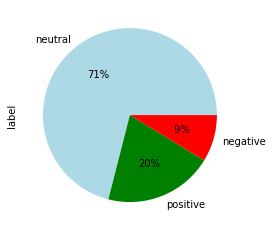

In [ ]:
data1.label.value_counts().plot(kind='pie', autopct='%2.0f%%', colors=["lightblue", "green", "red"])



In [ ]:
arb_stopwords = set(nltk.corpus.stopwords.words("arabic"))

In [ ]:
#preprossing tweets by passing them through diffrent phases (cleaning, reamoving stopwords, lemmatization)
def clean_txt(text):
  filtertext = ''   
  #Lower case
  text = text.lower()
  #Convert www.* or https?://* to URL
  text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','URL',text)
  # Convert any @Username to "AT_USER"
  text = re.sub('@[^\s]+','AT_USER',text)
  #Remove additional white spaces
  text = re.sub('[\n]+', ' ', text)
  #Punctuations removal
  text = re.sub(r'[^\w] ', '', text) 
  #Tokenization
  words = nltk.word_tokenize(text)
  words_tokens = [w for w in words if not w in arb_stopwords] 
  #Lemmatization
  for word in words_tokens:
    filtertext = filtertext + ' ' + str(lemmatizer.lemmatize(word).lower()) 
  
  return filtertext

In [ ]:
#Cleaned text
data1['tweet']=data1['tweet'].apply(clean_txt)

In [ ]:
#convert processed features that are text to numeric data using TfidfVectorizer
vectorizer = TfidfVectorizer()
processed_feature = vectorizer.fit_transform(data1['tweet']).toarray()

In [ ]:
#Convert the dataset into 2 attributes by assign x to features and y to label
features = processed_feature
labels   = data1['label'].map( {'neutral':2, 'positive':1 ,'negative':0 })



In [ ]:
#split data into 30 for testing and 70 for training 
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.30)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 5663 samples.
Testing set has 2427 samples.


In [ ]:
#Classification without applying SMOTE

#Multinomial Naive Bayes
model_naive = MultinomialNB()
model_naive.fit(X_train, Y_train) 
predicted_naive = model_naive.predict(X_test)

#Evaluation of MultinomialNB
naive_acc = metrics.accuracy_score(Y_test,predicted_naive)
naive_precision = precision_score(Y_test, predicted_naive , average="weighted")
naive_recall = recall_score(Y_test, predicted_naive , average="weighted")
naive_f1 = f1_score(Y_test, predicted_naive , average="weighted")

print('\n MultinomialNB Classifier')
print('Accuracy Score: {}'.format(naive_acc))
print('Precision Score: {}'.format(naive_precision))
print('Recall Score: {}'.format(naive_recall))
print('F-1 Score: {}'.format(naive_f1))


#Logistic Regression
LR = LogisticRegression(C=0.1)
LR.fit(X_train, Y_train)
Logistic_pred = LR.predict(X_test)

#Evaluation of Logistic Regression
logistic_acc = metrics.accuracy_score(Y_test,Logistic_pred)
logistic_precision = precision_score(Y_test, Logistic_pred , average="weighted")
logistic_recall = recall_score(Y_test, Logistic_pred , average="weighted")
logistic_f1 = f1_score(Y_test, Logistic_pred , average="weighted")

print('\nLogistic Regression')
print('Accuracy Score: {}'.format(logistic_acc))
print('Precision Score: {}'.format(logistic_precision))
print('Recall Score: {}'.format(logistic_recall))
print('F-1 Score: {}'.format(logistic_f1))


#Support Vector Machine 
SVM = LinearSVC()
SVM.fit(X_train, Y_train)
Support_pred = SVM.predict(X_test)

#Evaluation of SVM
svm_acc = metrics.accuracy_score(Y_test,Support_pred)
svm_precision = precision_score(Y_test, Support_pred , average="weighted")
svm_recall = recall_score(Y_test, Support_pred , average="weighted")
svm_f1 = f1_score(Y_test, Support_pred , average="weighted")

print('\nSupport Vector Machine')
print('Accuracy Score: {}'.format(svm_acc))
print('Precision Score: {}'.format(svm_precision))
print('Recall Score: {}'.format(svm_recall))
print('F-1 Score: {}'.format(svm_f1))



#Decision Tree Classifier
DT=DecisionTreeClassifier()
DT.fit(X_train, Y_train)
DT_pred = DT.predict(X_test)

#Evaluation of KNN
DT_acc = metrics.accuracy_score(Y_test,DT_pred)
DT_precision = precision_score(Y_test, DT_pred , average="weighted")
DT_recall = recall_score(Y_test, DT_pred , average="weighted")
DT_f1 = f1_score(Y_test, DT_pred , average="weighted")

print('\n Decision Tree')
print('Accuracy Score: {}'.format(DT_acc))
print('Precision Score: {}'.format(DT_precision))
print('Recall Score: {}'.format(DT_recall))
print('F-1 Score: {}'.format(DT_f1))




 MultinomialNB Classifier
Accuracy Score: 0.814997939843428
Precision Score: 0.8392848455449913
Recall Score: 0.814997939843428
F-1 Score: 0.7791695315979651

Logistic Regression
Accuracy Score: 0.7494849608570251
Precision Score: 0.7251000053310271
Recall Score: 0.7494849608570251
F-1 Score: 0.6680913761873136

Support Vector Machine
Accuracy Score: 0.9406674907292955
Precision Score: 0.9420941668618127
Recall Score: 0.9406674907292955
F-1 Score: 0.9389767025519477

 Decision Tree
Accuracy Score: 0.9332509270704573
Precision Score: 0.9330037569427793
Recall Score: 0.9332509270704573
F-1 Score: 0.9326617630645656


  Evaluation Metrics  Multinomial NB  Logistic Regression       SVM  Decision Tree
0           Accuracy        0.814998             0.749485  0.940667       0.933251
1          Precision        0.839285             0.725100  0.942094       0.933004
2             Recall        0.814998             0.749485  0.940667       0.933251
3           F1-score        0.779170             0.668091  0.938977       0.932662


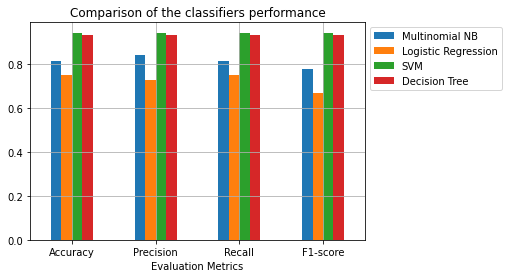

In [ ]:
#create a dataframe of evaluation metrics
df = pd.DataFrame([['Accuracy', naive_acc, logistic_acc, svm_acc, DT_acc], ['Precision', naive_precision, logistic_precision, svm_precision, DT_precision], ['Recall', naive_recall, logistic_recall, svm_recall, DT_recall],
                   ['F1-score', naive_f1, logistic_f1, svm_f1, DT_f1]],
                  columns=['Evaluation Metrics', 'Multinomial NB', 'Logistic Regression', 'SVM', 'Decision Tree'])
pd.set_option('display.expand_frame_repr', False)
#view data
print(df)

  
#plot grouped bar chart
df.plot(x='Evaluation Metrics',
        kind='bar',
        stacked=False,
        title='Comparison of the classifiers performance', rot=0, grid=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))